In [9]:
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))

In [5]:
### single cells
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
# res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)

In [6]:
sc_genes = unique(leads.ips$feature)
length(sc_genes)

[1] 10788

In [1]:
## bulk
leads.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ipsc/leads.csv", row.names = 1)
# res.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ipsc/allresults.csv", row.names = 1)

In [3]:
bulk_genes = unique(leads.bulk$feature)
length(bulk_genes)

[1] 10736

In [7]:
length(bulk_genes[bulk_genes %in% sc_genes])

[1] 10736

In [33]:
### inner join significant sc leads, all results from bulk
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
leads.sc.in.bulk = inner_join(leads.ips.sign, res.bulk, by = c("snp_id","feature"), suffix = c(".sc",".bulk"))
nrow(leads.sc.in.bulk)
a1 = nrow(leads.sc.in.bulk)

[1] 1830

In [ ]:
###################################################
######### Only nominal replication P < 5% #########
###################################################

In [34]:
### replication at nominal p-value (and %)
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05,])
b1 = nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05,])
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05,])/nrow(leads.sc.in.bulk)

[1] 1256

[1] 0.6863388

In [35]:
#### other way around - leads bulk in sc (sign FDR 10%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.1,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)
a2 = nrow(leads.bulk.in.sc)
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
b2 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

[1] 2906

[1] 1618

[1] 0.5567791

In [36]:
#### other way around - leads bulk in sc (sign FDR 1%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.01,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)
a3 = nrow(leads.bulk.in.sc)
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
b3 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

[1] 1366

[1] 1045

[1] 0.7650073

In [37]:
#### other way around - leads bulk in sc (sign FDR 0.1%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.001,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)
a4 = nrow(leads.bulk.in.sc)
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
b4 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

[1] 896

[1] 765

[1] 0.8537946

In [38]:
#### other way around - leads bulk in sc (sign FDR 0.01%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.0001,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)
a5 = nrow(leads.bulk.in.sc)
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
b5 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

[1] 634

[1] 568

[1] 0.8958991

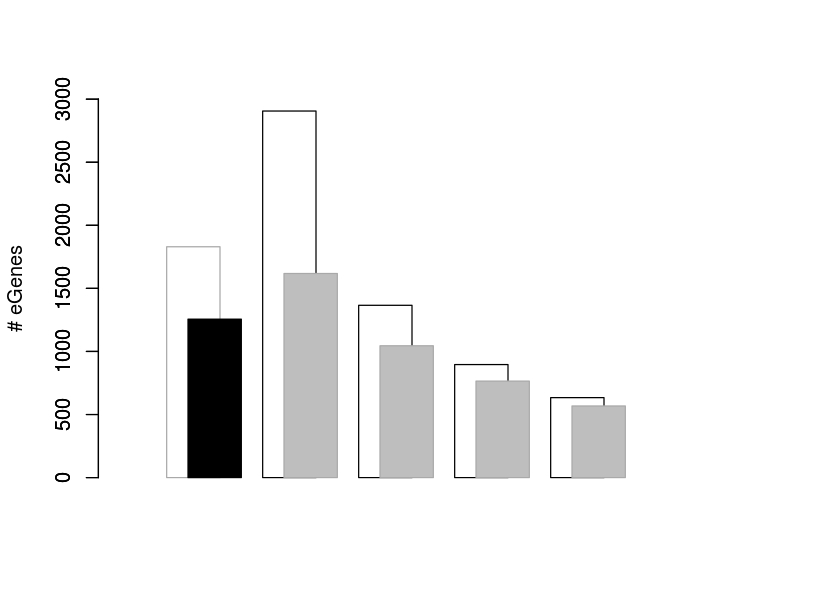

In [39]:
options(repr.plot.width = 7, repr.plot.height = 5)
all_discoveries <- c(a1, a2, a3, a4, a5)
replicating <- c(b1, b2, b3, b4, b5)
x <- barplot(all_discoveries, border = c('darkgray','black', 'black','black','black'), 
             col = 'white', xlim = c(0, 6), ylim = c(0, max(all_discoveries)+100), space = 0.8,
             width = 0.5, ylab = "# eGenes")
par(new = TRUE)
barplot(replicating,  border = c('black', 'darkgray','darkgray','darkgray','darkgray'), 
        col = c('black', 'gray','gray','gray','gray'),
        xlim = c(-0.2, 5.8), ylim = c(0, max(all_discoveries)+100),
        width = 0.5, space = 0.8, axisnames = FALSE)

In [ ]:
###############################################
######### Nominal replication P < 5% #########
######### & same direction effect ############
##############################################

In [40]:
### replication at nominal p-value and same direction effect (and %)
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05 & 
                      (leads.sc.in.bulk$beta.bulk*leads.sc.in.bulk$beta.sc)>0,])
b1 = nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05 & 
                      (leads.sc.in.bulk$beta.bulk*leads.sc.in.bulk$beta.sc)>0,])
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05 & 
                      (leads.sc.in.bulk$beta.bulk*leads.sc.in.bulk$beta.sc)>0,])/nrow(leads.sc.in.bulk)

[1] 1217

[1] 0.6650273

In [41]:
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.1,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
b2 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 1577

[1] 0.5426703

In [42]:
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.01,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
b3 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 1032

[1] 0.7554905

In [43]:
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.001,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
b4 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 759

[1] 0.8470982

In [44]:
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.0001,]
leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
b5 = nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 567

[1] 0.8943218

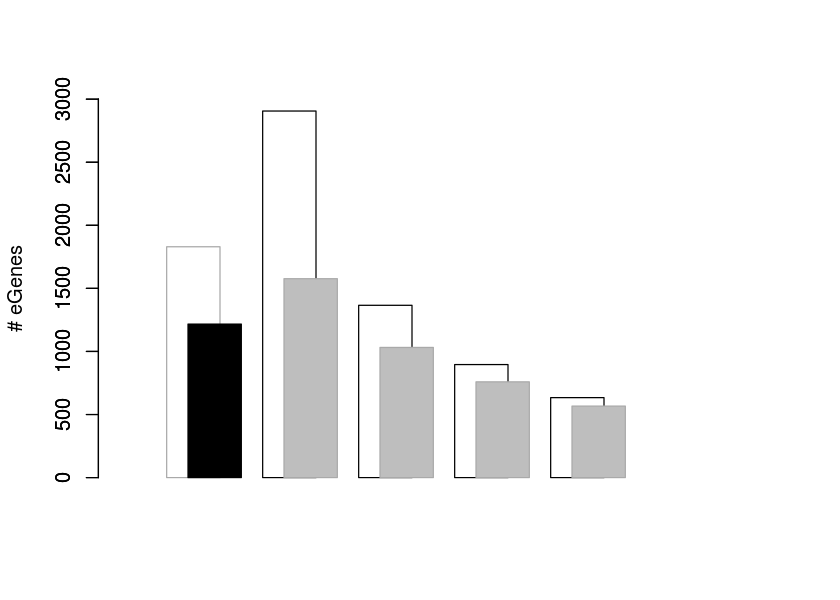

In [45]:
options(repr.plot.width = 7, repr.plot.height = 5)
all_discoveries <- c(a1, a2, a3, a4, a5)
replicating <- c(b1, b2, b3, b4, b5)
x <- barplot(all_discoveries, border = c('darkgray','black', 'black','black','black'), 
             col = 'white', xlim = c(0, 6), ylim = c(0, max(all_discoveries)+100), space = 0.8,
             width = 0.5, ylab = "# eGenes")
par(new = TRUE)
barplot(replicating,  border = c('black', 'darkgray','darkgray','darkgray','darkgray'), 
        col = c('black', 'gray','gray','gray','gray'),
        xlim = c(-0.2, 5.8), ylim = c(0, max(all_discoveries)+100),
        width = 0.5, space = 0.8, axisnames = FALSE)